In [1]:
library(readxl)
library(ggplot2)
library(caret)
library(reshape2)

options(repr.plot.width=12, repr.plot.height=6) # plots size

Loading required package: lattice



In [2]:
churn <- read_excel("data/Churn.xls")
head(churn)

Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
118,0,223.4,220.6,203.9,6.3,0,0,1,0,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027


In [3]:
# check column names
names(churn)

[1] "Account Length" "VMail Message"  "Day Mins"       "Eve Mins"      
 [5] "Night Mins"     "Intl Mins"      "CustServ Calls" "Churn"         
 [9] "Int'l Plan"     "VMail Plan"     "Day Calls"      "Day Charge"    
[13] "Eve Calls"      "Eve Charge"     "Night Calls"    "Night Charge"  
[17] "Intl Calls"     "Intl Charge"    "State"          "Area Code"     
[21] "Phone"

In [4]:
# transform column names
names(churn) <- make.names(names(churn))

In [5]:
names(churn)

[1] "Account.Length" "VMail.Message"  "Day.Mins"       "Eve.Mins"      
 [5] "Night.Mins"     "Intl.Mins"      "CustServ.Calls" "Churn"         
 [9] "Int.l.Plan"     "VMail.Plan"     "Day.Calls"      "Day.Charge"    
[13] "Eve.Calls"      "Eve.Charge"     "Night.Calls"    "Night.Charge"  
[17] "Intl.Calls"     "Intl.Charge"    "State"          "Area.Code"     
[21] "Phone"

In [6]:
str(churn)

Classes 'tbl_df', 'tbl' and 'data.frame':	3333 obs. of  21 variables:
 $ Account.Length: num  128 107 137 84 75 118 121 147 117 141 ...
 $ VMail.Message : num  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Intl.Mins     : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 $ CustServ.Calls: num  1 1 0 2 3 0 3 0 1 0 ...
 $ Churn         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Int.l.Plan    : num  0 0 0 1 1 1 0 1 0 1 ...
 $ VMail.Plan    : num  1 1 0 0 0 0 1 0 0 1 ...
 $ Day.Calls     : num  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Calls     : num  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Calls   : num  91 103 104 89 121 118 118 96 90 97 ...
 $ Night.Charge  : num  11.01 11.45 7.32 8.86 8.41 ...
 $ Intl.Calls    : num  3 3 5 7 3 6 7 6 4 5

### Split train and test

In [7]:
idx = createDataPartition(y = churn$Churn, times = 1, p = 0.7, list=FALSE)
train = churn[idx, ]
test = churn[-idx, ]

In [8]:
train$State <- as.factor(train$State)
train$Churn <- as.factor(train$Churn)
train$Area.Code <- as.factor(train$Area.Code)

In [9]:
str(train)

Classes 'tbl_df', 'tbl' and 'data.frame':	2334 obs. of  21 variables:
 $ Account.Length: num  107 137 84 75 118 147 117 65 168 62 ...
 $ VMail.Message : num  26 0 0 0 0 0 0 0 0 0 ...
 $ Day.Mins      : num  162 243 299 167 223 ...
 $ Eve.Mins      : num  195.5 121.2 61.9 148.3 220.6 ...
 $ Night.Mins    : num  254 163 197 187 204 ...
 $ Intl.Mins     : num  13.7 12.2 6.6 10.1 6.3 7.1 8.7 12.7 11.2 13.1 ...
 $ CustServ.Calls: num  1 0 2 3 0 0 1 4 1 4 ...
 $ Churn         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ Int.l.Plan    : num  0 0 1 1 1 1 0 0 0 0 ...
 $ VMail.Plan    : num  1 0 0 0 0 0 0 0 0 0 ...
 $ Day.Calls     : num  123 114 71 113 98 79 97 137 96 70 ...
 $ Day.Charge    : num  27.5 41.4 50.9 28.3 38 ...
 $ Eve.Calls     : num  103 110 88 122 101 94 80 83 71 76 ...
 $ Eve.Charge    : num  16.62 10.3 5.26 12.61 18.75 ...
 $ Night.Calls   : num  103 104 89 121 118 96 90 111 128 99 ...
 $ Night.Charge  : num  11.45 7.32 8.86 8.41 9.18 ...
 $ Intl.Calls    : num  3 

## Some EDA

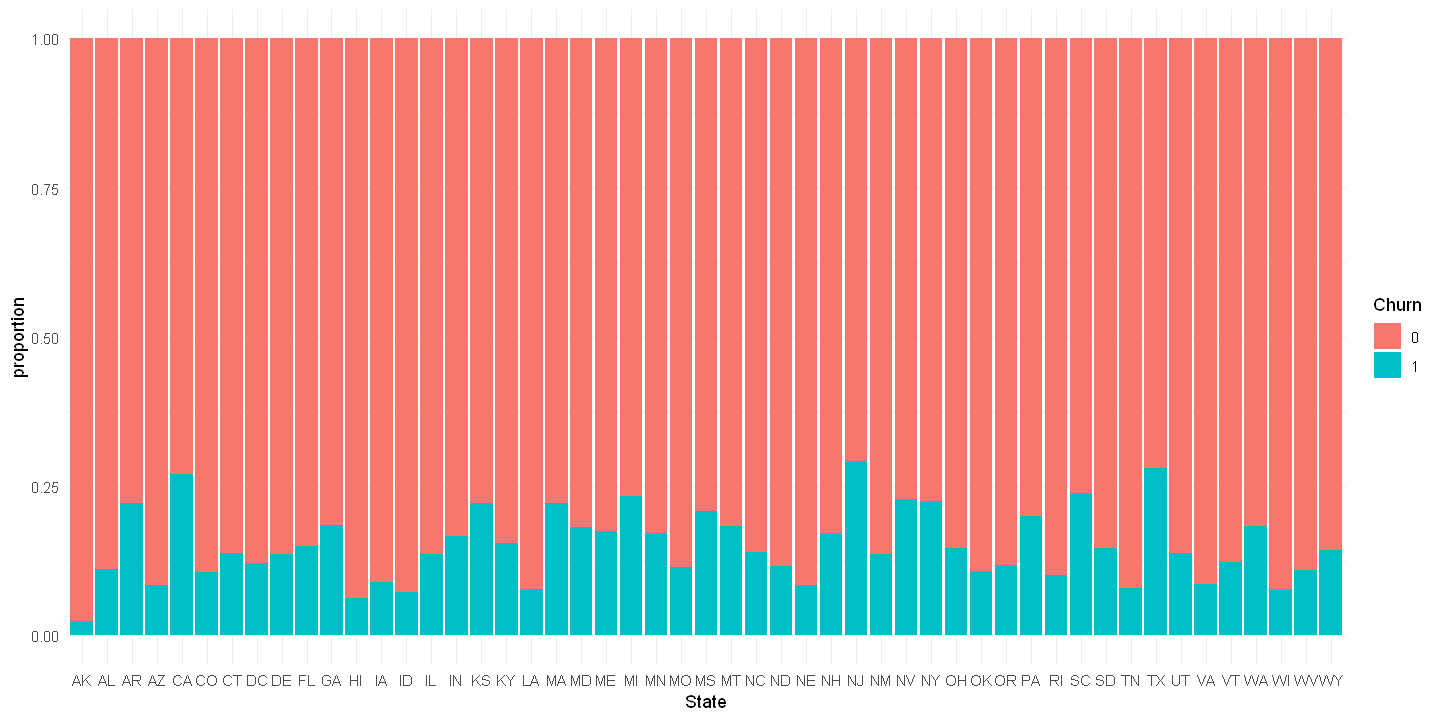

In [10]:
ggplot(train) + 
geom_bar(aes(x = State, fill = Churn), position = 'fill') +
theme_minimal() +
labs(y = 'proportion')

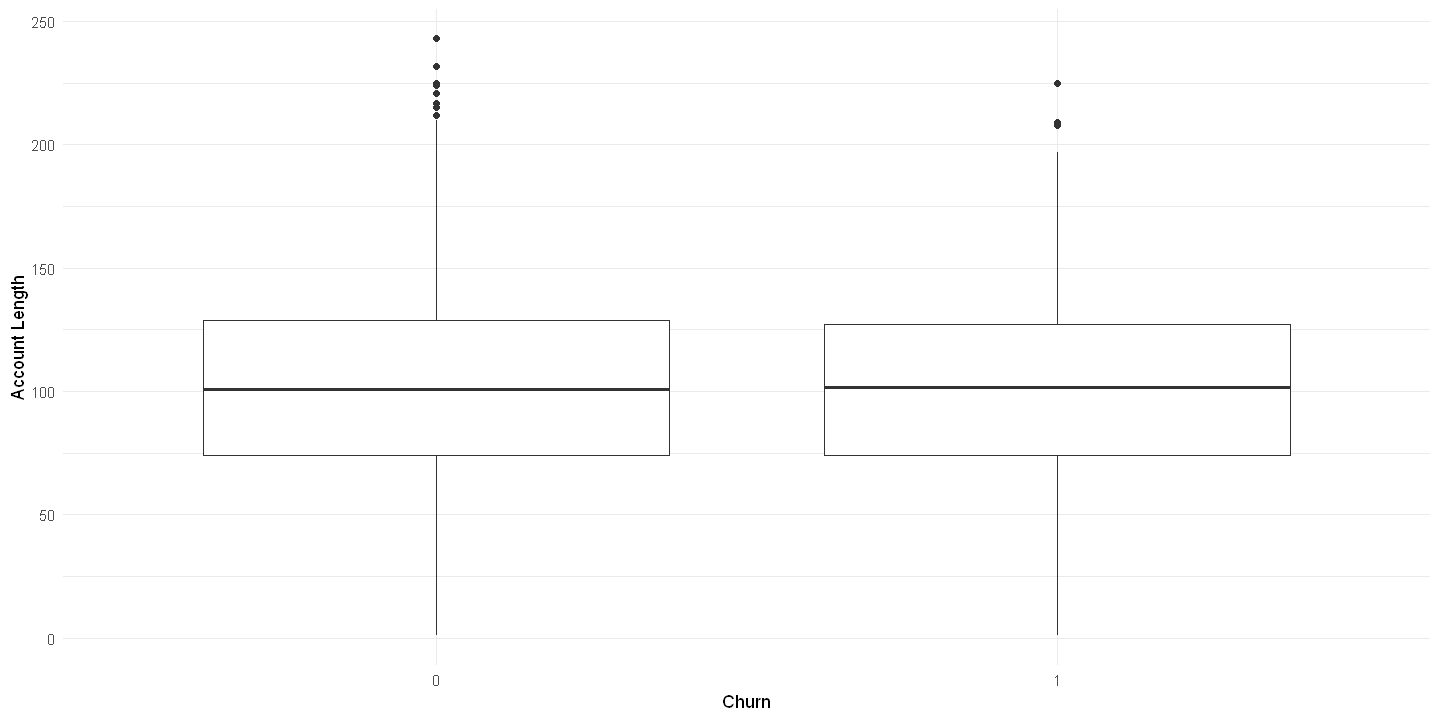

In [11]:
ggplot(train) + 
geom_boxplot(aes(x = Churn, y = Account.Length)) +
theme_minimal() +
labs(y = 'Account Length')

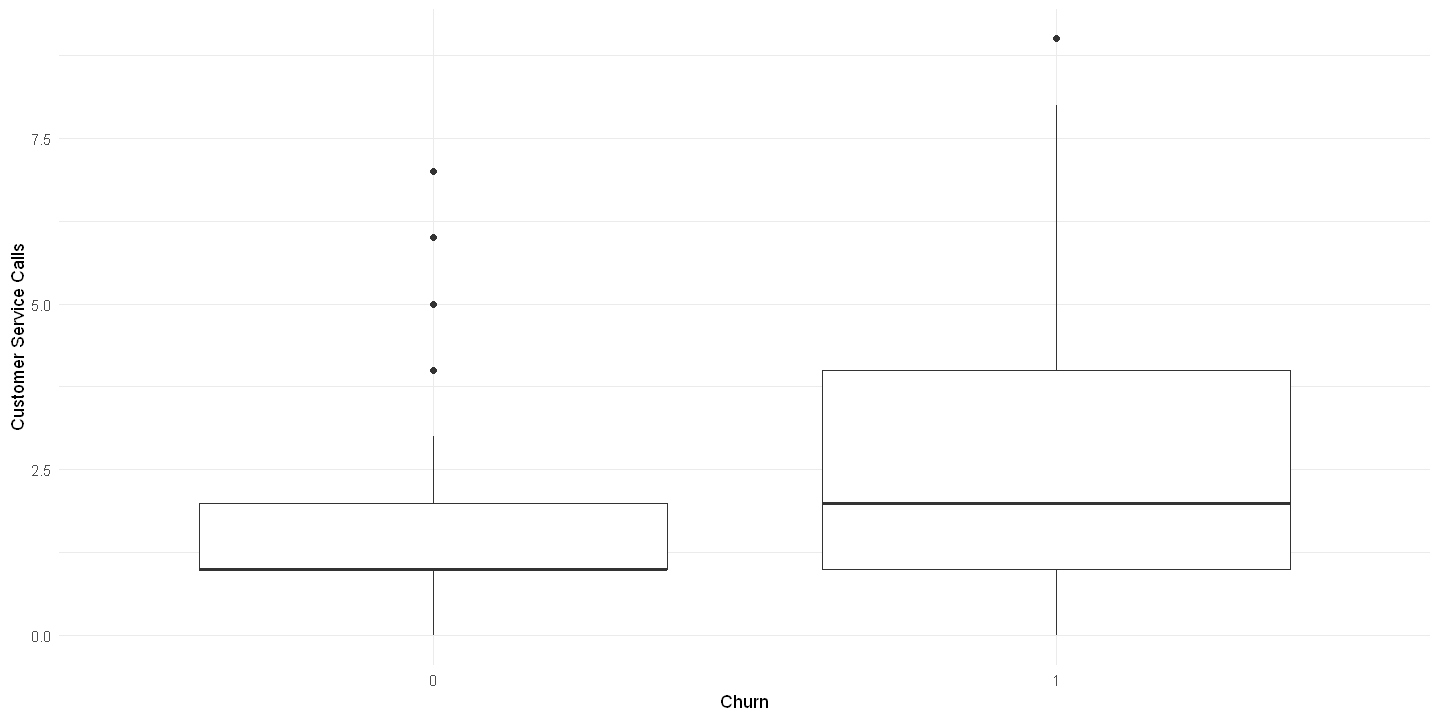

In [12]:
ggplot(train) + 
geom_boxplot(aes(x = Churn, y = CustServ.Calls)) +
theme_minimal() +
labs(y = 'Customer Service Calls')

In [13]:
table(train$CustServ.Calls, train$Churn)

   
      0   1
  0 419  70
  1 720  85
  2 473  61
  3 272  30
  4  72  58
  5  19  27
  6   5  12
  7   4   4
  8   0   1
  9   0   2

In [14]:
call_churn <- data.frame(table(train$CustServ.Calls, train$Churn))
names(call_churn) <- c('calls', 'churn', 'count')
str(call_churn)

'data.frame':	20 obs. of  3 variables:
 $ calls: Factor w/ 10 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ churn: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ count: int  419 720 473 272 72 19 5 4 0 0 ...


In [15]:
call_churn$calls <- as.numeric(call_churn$calls)
str(call_churn)

'data.frame':	20 obs. of  3 variables:
 $ calls: num  1 2 3 4 5 6 7 8 9 10 ...
 $ churn: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ count: int  419 720 473 272 72 19 5 4 0 0 ...


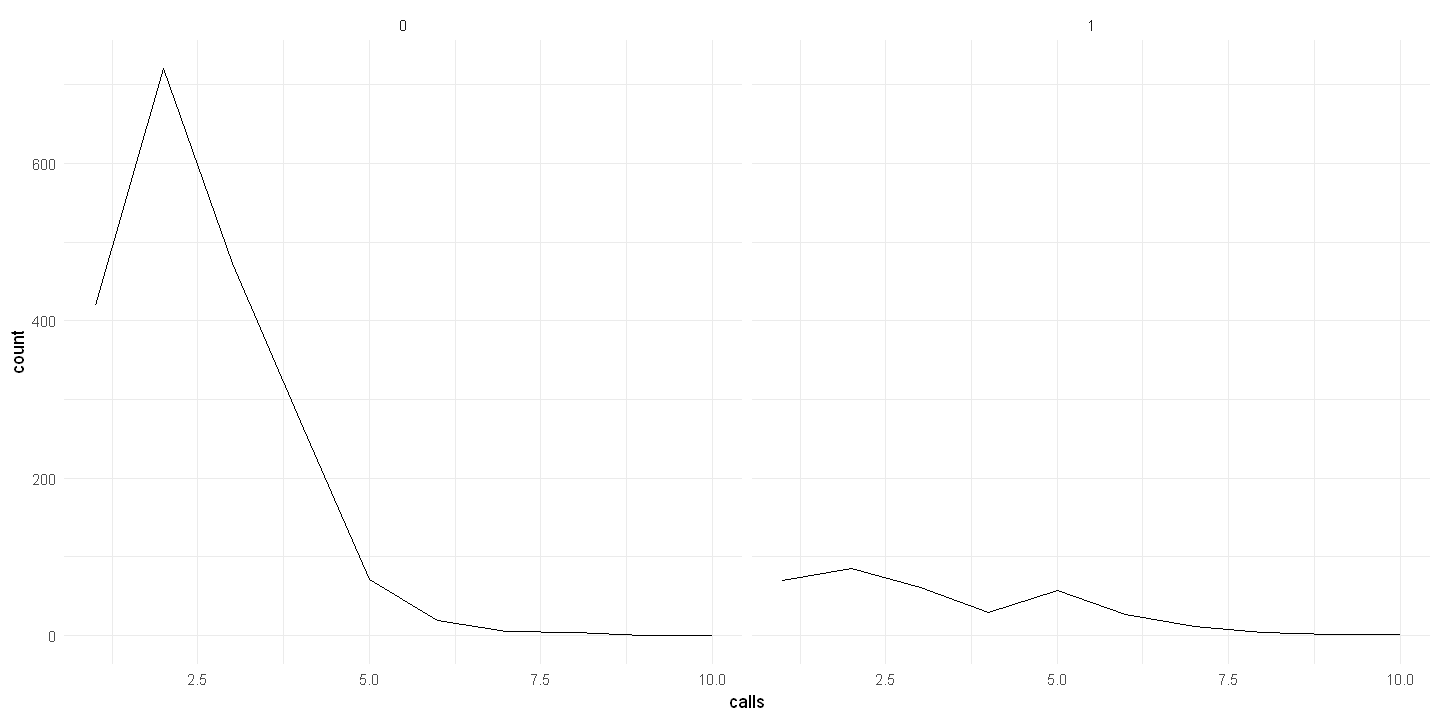

In [16]:
ggplot(call_churn) + 
geom_line(aes(x = calls, y = count)) + 
facet_wrap(~churn) +
theme_minimal()

In [ ]:
# drop Phone variable
train$Phone <- NULL

### Apply preprocess to test data

In [26]:
test$Phone <- NULL

In [27]:
test$State <- factor(test$State, levels = levels(train$State))
test$Churn <- factor(test$Churn, levels = levels(train$Churn))
test$Area.Code <- factor(test$Area.Code, levels = levels(train$Area.Code))

In [28]:
str(test)

Classes 'tbl_df', 'tbl' and 'data.frame':	999 obs. of  20 variables:
 $ Account.Length: num  128 121 141 74 95 73 174 57 20 57 ...
 $ VMail.Message : num  25 24 37 0 0 0 0 39 0 25 ...
 $ Day.Mins      : num  265 218 259 188 157 ...
 $ Eve.Mins      : num  197 348 222 163 248 ...
 $ Night.Mins    : num  245 213 326 196 192 ...
 $ Intl.Mins     : num  10 7.5 11.2 9.1 12.3 13 15.5 9.5 6.3 8.3 ...
 $ CustServ.Calls: num  1 3 0 0 3 1 3 0 0 0 ...
 $ Churn         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Int.l.Plan    : num  0 0 1 0 0 0 0 0 0 0 ...
 $ VMail.Plan    : num  1 1 1 0 0 0 0 1 0 1 ...
 $ Day.Calls     : num  110 88 84 127 88 90 76 115 109 94 ...
 $ Day.Charge    : num  45.1 37.1 44 31.9 26.6 ...
 $ Eve.Calls     : num  99 108 111 148 75 88 112 112 84 75 ...
 $ Eve.Charge    : num  16.8 29.6 18.9 13.9 21.1 ...
 $ Night.Calls   : num  91 118 97 94 115 74 115 115 102 116 ...
 $ Night.Charge  : num  11.01 9.57 14.69 8.82 8.65 ...
 $ Intl.Calls    : num  3 7 5 5 5 2 5 3 

### Models

In [21]:
cv_folds <- createMultiFolds(train$Churn, k = 10, times = 3)
cv_control <- trainControl(method = "repeatedcv", number = 10,
                         repeats = 3, index = cv_folds)

In [22]:
rpart_cv_m1 <- train(Churn ~ ., data = train, method = "rpart", 
                    trControl = cv_control, tuneLength = 7)

In [23]:
varImp(rpart_cv_m1)

rpart variable importance

  only 20 most important variables shown (out of 69)

               Overall
Day.Mins       100.000
Day.Charge      98.420
Int.l.Plan      73.324
CustServ.Calls  72.766
Intl.Mins       56.166
Eve.Mins        51.517
Eve.Charge      51.517
Intl.Charge     49.164
Intl.Calls      21.604
VMail.Message   14.357
VMail.Plan      14.357
Night.Mins       9.484
Day.Calls        3.351
Night.Charge     3.024
Night.Calls      1.717
StateDE          0.000
StateDC          0.000
StateKS          0.000
StateCA          0.000
StateTN          0.000

In [24]:
rpart_cv_m1

CART 

2334 samples
  19 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 2101, 2100, 2100, 2101, 2101, 2101, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.01428571  0.9411614  0.74791866
  0.02142857  0.9341666  0.71422355
  0.03142857  0.9304525  0.70010343
  0.05285714  0.9130259  0.60747760
  0.06571429  0.8935977  0.51364241
  0.08285714  0.8746102  0.38720231
  0.11142857  0.8508981  0.09785101

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01428571.

In [25]:
confusionMatrix(train$Churn, predict(object = rpart_cv_m1, newdata = train))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1967   17
         1  101  249
                                         
               Accuracy : 0.9494         
                 95% CI : (0.9398, 0.958)
    No Information Rate : 0.886          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7799         
                                         
 Mcnemar's Test P-Value : 2.159e-14      
                                         
            Sensitivity : 0.9512         
            Specificity : 0.9361         
         Pos Pred Value : 0.9914         
         Neg Pred Value : 0.7114         
             Prevalence : 0.8860         
         Detection Rate : 0.8428         
   Detection Prevalence : 0.8500         
      Balanced Accuracy : 0.9436         
                                         
       'Positive' Class : 0              
                                         

In [29]:
confusionMatrix(test$Churn, predict(object = rpart_cv_m1, newdata = test))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 853  13
         1  47  86
                                          
               Accuracy : 0.9399          
                 95% CI : (0.9234, 0.9539)
    No Information Rate : 0.9009          
    P-Value [Acc > NIR] : 6.893e-06       
                                          
                  Kappa : 0.7082          
                                          
 Mcnemar's Test P-Value : 2.042e-05       
                                          
            Sensitivity : 0.9478          
            Specificity : 0.8687          
         Pos Pred Value : 0.9850          
         Neg Pred Value : 0.6466          
             Prevalence : 0.9009          
         Detection Rate : 0.8539          
   Detection Prevalence : 0.8669          
      Balanced Accuracy : 0.9082          
                                          
       'Positive' Class : 0               
                              

In [32]:
# Precision: Of all people where we predicted churn what fraction actually is churn
# Recall: Of all people that actually are churn, what fraction did we correcyly identified as churn

cat("Precision churn: ", 86/(86+47), "\n")
cat("Recall churn: ", 86/(86+13), "\n")
cat("F-Score churn: ", 2*(86/(86+47) * 86/(86+13)) / (86/(86+47) + 86/(86+13)))

Precision churn:  0.6466165 
Recall churn:  0.8686869 
F-Score churn:  0.7413793

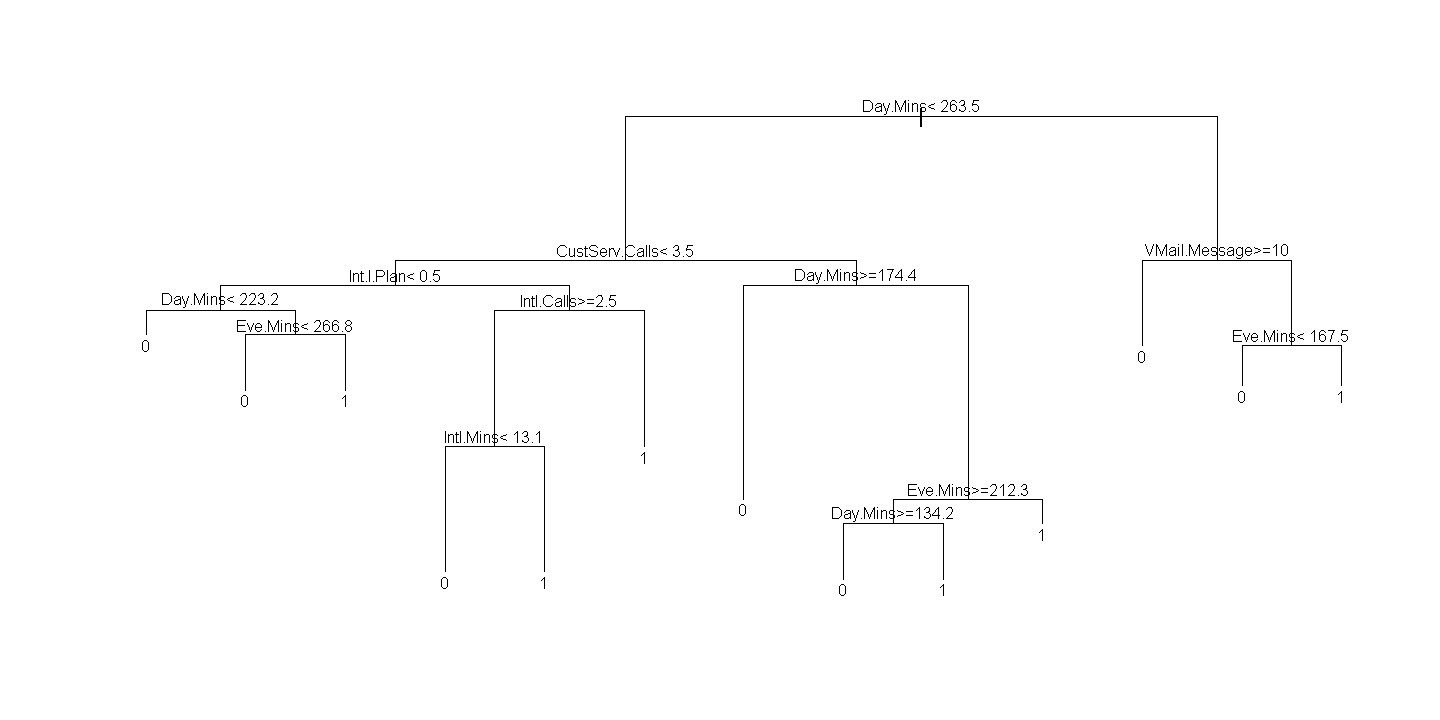

In [33]:
plot(rpart_cv_m1$finalModel)
text(rpart_cv_m1$finalModel, cex=.8)

In [34]:
modelLookup('xgbTree')

,model,parameter,label,forReg,forClass,probModel
,<chr>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1,xgbTree,nrounds,# Boosting Iterations,TRUE,TRUE,TRUE
2,xgbTree,max_depth,Max Tree Depth,TRUE,TRUE,TRUE
3,xgbTree,eta,Shrinkage,TRUE,TRUE,TRUE
4,xgbTree,gamma,Minimum Loss Reduction,TRUE,TRUE,TRUE
5,xgbTree,colsample_bytree,Subsample Ratio of Columns,TRUE,TRUE,TRUE
6,xgbTree,min_child_weight,Minimum Sum of Instance Weight,TRUE,TRUE,TRUE
7,xgbTree,subsample,Subsample Percentage,TRUE,TRUE,TRUE


In [35]:
xgboost_cv_m1 <- train(Churn ~ ., data = train, method = "xgbTree", 
                    trControl = cv_control, tuneLength = 7)

In [36]:
saveRDS(xgboost_cv_m1, "./models/xgboost_cv_m1.rds")

In [37]:
xgboost_cv_m1$bestTune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
683,200,7,0.3,0,0.8,1,1


In [38]:
varImp(xgboost_cv_m1)

xgbTree variable importance

  only 20 most important variables shown (out of 69)

                Overall
Day.Mins       100.0000
Eve.Mins        56.7099
CustServ.Calls  47.9683
Intl.Mins       36.4386
Int.l.Plan      33.8129
Intl.Calls      30.3857
VMail.Message   27.6021
Night.Mins      24.7591
Day.Charge      19.6686
Eve.Charge      11.9447
Account.Length  11.9431
Day.Calls       11.6548
Eve.Calls       10.0037
Night.Calls      9.9639
Night.Charge     3.1785
Intl.Charge      2.8446
VMail.Plan       1.6828
Area.Code415     1.6394
StateTX          1.5529
StateNJ          0.8542

In [39]:
confusionMatrix(train$Churn, predict(object = xgboost_cv_m1, newdata = train))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1984    0
         1    0  350
                                     
               Accuracy : 1          
                 95% CI : (0.9984, 1)
    No Information Rate : 0.85       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.85       
         Detection Rate : 0.85       
   Detection Prevalence : 0.85       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : 0          
                                     

In [40]:
confusionMatrix(test$Churn, predict(object = xgboost_cv_m1, newdata = test))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 856  10
         1  38  95
                                          
               Accuracy : 0.952           
                 95% CI : (0.9368, 0.9644)
    No Information Rate : 0.8949          
    P-Value [Acc > NIR] : 6.289e-11       
                                          
                  Kappa : 0.7715          
                                          
 Mcnemar's Test P-Value : 9.735e-05       
                                          
            Sensitivity : 0.9575          
            Specificity : 0.9048          
         Pos Pred Value : 0.9885          
         Neg Pred Value : 0.7143          
             Prevalence : 0.8949          
         Detection Rate : 0.8569          
   Detection Prevalence : 0.8669          
      Balanced Accuracy : 0.9311          
                                          
       'Positive' Class : 0               
                              

In [41]:
# Precision: Of all people where we predicted churn what fraction actually is churn
# Recall: Of all people that actually are churn, what fraction did we correcyly identified as churn

cat("Precision churn: ", 95/(95+38), "\n")
cat("Recall churn: ", 95/(95+10), "\n")
cat("F-Score churn: ", 2*(95/(95+38) * 95/(95+10))/(95/(95+38) + 95/(95+10)))

Precision churn:  0.7142857 
Recall churn:  0.9047619 
F-Score churn:  0.7983193

In [42]:
# TODO
# try feature engineering
# transform area code to factor
# try other methods
# try cluster then predict

In [43]:
# available models in caret
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         